# 0. Install Dependencies and Bring in Data

In [2]:
!pip install tensorflow 

/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [4]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [6]:
os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv')

'jigsaw-toxic-comment-classification-challenge/train.csv/train.csv'

In [7]:
df = pd.read_csv(os.path.join('jigsaw-toxic-comment-classification-challenge','train.csv', 'train.csv'))

In [8]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [9]:
df.iloc[0]['comment_text']

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [10]:
df[df.columns]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [ ]:
df[df['toxic']==1].head()

# 1. Preprocess

In [11]:
!pip list

/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Package                       Version
----------------------------- --------------------
absl-py                       2.0.0
aiobotocore                   2.5.0
aiofiles                      22.1.0
aiohttp                       3.8.3
aioitertools                  0.7.1
aiosignal                     1.2.0
aiosqlite                     0.18.0
alabaster                     0.7.12
altair                        5.3.0
anaconda-catalogs             0.2.0
anaconda-client               1.11.3
anaconda-navigator            2.4.2
anaconda-project              0.11.1
annotated-types               0.6.0
anyio                         3.5.0
appdirs                       1.4.4
applaunchservices             0.3.0
appnope                       0.1.2
appscript                     1.1.2
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
arrow                         1.2.3
astroid                       2.14.2
astropy                       5.1
asttokens                     2.0.5
astun

In [12]:
from tensorflow.keras.layers import TextVectorization
#tokenization

In [13]:
help(TextVectorization)

Help on class TextVectorization in module keras.src.layers.preprocessing.text_vectorization:

class TextVectorization(keras.src.engine.base_preprocessing_layer.PreprocessingLayer)
 |  TextVectorization(max_tokens=None, standardize='lower_and_strip_punctuation', split='whitespace', ngrams=None, output_mode='int', output_sequence_length=None, pad_to_max_tokens=False, vocabulary=None, idf_weights=None, sparse=False, ragged=False, encoding='utf-8', **kwargs)
 |  
 |  A preprocessing layer which maps text features to integer sequences.
 |  
 |  This layer has basic options for managing text in a Keras model. It
 |  transforms a batch of strings (one example = one string) into either a list
 |  of token indices (one example = 1D tensor of integer token indices) or a
 |  dense representation (one example = 1D tensor of float values representing
 |  data about the example's tokens). This layer is meant to handle natural
 |  language inputs. To handle simple string inputs (categorical strings o

In [14]:
X = df['comment_text']
y = df[df.columns[2:]].values
print(X)

0         Explanation\nWhy the edits made under my usern...
1         D'aww! He matches this background colour I'm s...
2         Hey man, I'm really not trying to edit war. It...
3         "\nMore\nI can't make any real suggestions on ...
4         You, sir, are my hero. Any chance you remember...
                                ...                        
159566    ":::::And for the second time of asking, when ...
159567    You should be ashamed of yourself \n\nThat is ...
159568    Spitzer \n\nUmm, theres no actual article for ...
159569    And it looks like it was actually you who put ...
159570    "\nAnd ... I really don't think you understand...
Name: comment_text, Length: 159571, dtype: object


In [15]:
MAX_FEATURES = 200000 # number of words in the vocab

In [16]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [17]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=1800,
                               output_mode='int')

In [18]:
vectorizer.adapt(X.values)

In [19]:
vectorizer('Hello world, life is great')[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([288, 263, 306,   9, 275])>

In [20]:
vectorized_text = vectorizer(X.values)

In [21]:
#MCSHBAP - map, chache, shuffle, batch, prefetch  from_tensor_slices, list_file
#datapipelines
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text, y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) # helps bottlenecks

In [22]:
dataset.as_numpy_iterator().next()

(array([[ 1304,     3,    36, ...,     0,     0,     0],
        [ 1442,  7843, 22749, ...,     0,     0,     0],
        [ 1761,    11, 18694, ...,     0,     0,     0],
        ...,
        [ 1757,     7,    20, ...,     0,     0,     0],
        [ 2093,  1040,    12, ...,     0,     0,     0],
        [   16,  3534,   200, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [1, 0, 1, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 1, 0]]))

In [23]:
batch_X,batch_y = dataset.as_numpy_iterator().next()

In [24]:
int(len(dataset)*.7)

6981

In [25]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
len(test)

997

In [27]:
train_generator = train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[ 1869,  1421,     8, ...,     0,     0,     0],
        [  124,     7,    13, ...,     0,     0,     0],
        [   46,  3884,    29, ...,     0,     0,     0],
        ...,
        [    8,    74,  3435, ...,     0,     0,     0],
        [ 2023,     2, 14695, ...,     0,     0,     0],
        [ 5520,   797,     8, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# 2. Create Sequential Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
model = Sequential()
# Create the embedding layer 
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final layer 
model.add(Dense(6, activation='sigmoid'))

In [31]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirection  (None, 64)                16640     
 al)                                                             
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [35]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 2753s 394ms/step - loss: 0.0630 - val_loss: 0.0467


In [37]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

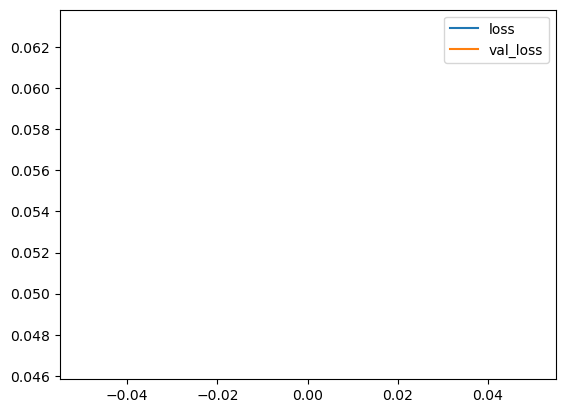

In [38]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [39]:
input_text = vectorizer('You freaking suck! I am going to fuck you.')

In [40]:
batch = test.as_numpy_iterator().next()
#give the next batch 

In [41]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [42]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [43]:
np.expand_dims(input_text,0)

array([[   7, 7158,  397, ...,    0,    0,    0]])

In [44]:
res = model.predict(np.expand_dims(input_text,0))
print(res)

1/1 [==============================] - 0s 416ms/step
[[0.99796396 0.355217   0.97881615 0.04819175 0.91184294 0.1894193 ]]


In [45]:
(res > 0.5).astype(int)

array([[1, 0, 1, 0, 1, 0]])

In [46]:
batch_X, batch_y = test.as_numpy_iterator().next()


In [47]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [48]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 55ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [49]:
res.shape

(1, 6)

In [50]:
res = model.predict(batch_X)

1/1 [==============================] - 0s 58ms/step


In [51]:
res.flatten()

array([8.86845868e-03, 3.49850438e-07, 3.72050417e-04, 5.22093360e-05,
       3.36034049e-04, 5.75947779e-05, 1.37837250e-02, 6.88365105e-07,
       9.57621902e-04, 9.10197341e-05, 8.10570375e-04, 1.38818548e-04,
       2.81976489e-03, 2.10542250e-08, 7.92643987e-05, 9.09751634e-06,
       7.01120589e-05, 1.00769776e-05, 4.13023052e-04, 1.89468760e-10,
       2.19567155e-05, 6.08911080e-07, 1.17300951e-05, 1.50536709e-06,
       2.14057905e-03, 1.10973568e-08, 5.15083375e-05, 6.03632134e-06,
       4.57302704e-05, 6.32169667e-06, 4.91614593e-03, 1.01139221e-07,
       2.21643873e-04, 2.48203069e-05, 1.84208955e-04, 3.14447025e-05,
       4.59423661e-03, 5.67601646e-08, 4.44223260e-04, 2.29620146e-05,
       2.93096644e-04, 4.79206974e-05, 5.12648840e-03, 7.14347621e-08,
       5.10233338e-04, 2.81077300e-05, 3.38131736e-04, 5.63424401e-05,
       1.34102535e-03, 3.58988173e-09, 2.89732925e-05, 2.93040807e-06,
       2.42906026e-05, 3.15077182e-06, 1.56586677e-01, 2.86875700e-04,
      

# 4. Evaluate Model

In [52]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [53]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [54]:
for batch in test.as_numpy_iterator(): 
    # Unpack the batch 
    X_true, y_true = batch
    # Make a prediction 
    yhat = model.predict(X_true)
    
    # Flatten the predictions
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)

1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 47ms/step


1/1 [==============================] - 0s 44ms/step


1/1 [==============================] - 0s 42ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 43ms/step


1/1 [==============================] - 0s 44ms/step


In [74]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8275862336158752, Recall:0.6886075735092163, Accuracy:0.5175526738166809


# 5. Test and Gradio

In [26]:
!pip install gradio jinja2

In [1]:
conda install -c conda-forge fsspec

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 23.7.4
  latest version: 24.3.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=24.3.0



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install typing-extensions==3.10.0.2

Note: you may need to restart the kernel to use updated packages.


In [37]:
pip install --upgrade pydantic fastapi gradio gradio-client


Note: you may need to restart the kernel to use updated packages.


In [33]:
pip install --upgrade torch==2.2.2


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 MB 639.2 kB/s eta 0:00:0000:0100:03
  Attempting uninstall: torch
    Found existing installation: torch 2.1.0.post100
    Uninstalling torch-2.1.0.post100:
      Successfully uninstalled torch-2.1.0.post100
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade typing-extensions


/Users/praveenchalla/anaconda3/lib/python3.11/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


  Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
Note: you may need to restart the kernel to use updated packages.


In [36]:
import tensorflow as tf
import gradio as gr

In [8]:
!pip list | grep fastapi


fastapi                       0.110.2


In [15]:
!pip install --upgrade fastapi typing_extensions

In [55]:
model.save('toxicity.h5')

/Users/praveenchalla/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [56]:
model = tf.keras.models.load_model('toxicity.h5')

In [57]:
input_str = vectorizer('hey i freaken hate you! i\'m gonna hurt you')


In [58]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [59]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 371ms/step


In [60]:
res

array([[0.87950826, 0.07883841, 0.64299345, 0.05641285, 0.5141907 ,
        0.10978534]], dtype=float32)

In [68]:
def score_comment(comment):
    vectorized_comment = vectorizer([comment])
    results = model.predict(vectorized_comment)
    
    text = ''
    for idx, col in enumerate(df.columns[2:]):
        text += '{}: {}\n'.format(col, results[0][idx]>0.5)
    
    return text

In [69]:
interface = gr.Interface(fn=score_comment, 
                         inputs=gr.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

In [70]:
interface.launch(share=True)

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://1b22e1e475efa97202.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


1/1 [==============================] - 0s 163ms/step
